**Covid 19_outcomes_vaccination_historical analysis**

**Introduction**

The Covid-19 pandemic, which began in late 2019, created an unprecedented global health and economic crisis.
The impact of the virus varied across countries in terms of infection rates, hospitalizations, recovery, and mortality.
Vaccination played a crucial role in controlling the spread of the disease and reducing severe outcomes.
 As vaccination coverage increased, many studies reported a significant decline in severe cases and deaths. 
This historical analysis aims to examine the relationship between Covid-19 outcomes and vaccination trends, 
helping to understand how vaccination efforts influenced public health and how such insights can support better preparedness for future pandemics.

ROWS           : 3753
COLUMNS        : 21
Attribute Type :  Mixed (Numeric & Categorical)
Purpose        :   Study relationship between Covid-19 outcomes & vaccination trends   


      

**Dataset Sources**
   ****data.gov,in (India)  https://www.data.gov.in/**

*Atribute details**
| Column Name                      | Description / Meaning                                           |
|----------------------------------|-----------------------------------------------------------------|
| outcome                          | Type of COVID-19 outcome (Cases, Hospitalizations, Deaths)      |
| week_end                         | Ending date of the reporting week                               |
| age_group                        | Age category (example: 18+, 50–64, 65+)                         |
| unvaccinated_rate                | Outcome rate among unvaccinated individuals                     |
| crude_vaccinated_rate            | Crude outcome rate among vaccinated individuals                 |
| boosted_rate                     | Outcome rate among people who received booster doses            |
| age_adjusted_rate                | Age-adjusted total outcome rate                                 |
| age_adjusted_unvaccinated_rate   | Age-adjusted rate for unvaccinated individuals                  |
| age_adjusted_vaccinated_rate     | Age-adjusted rate for vaccinated individuals                    |
| age_adjusted_boosted_rate        | Age-adjusted rate for booster-dose individuals                  |
| population_unvaccinated          | Total unvaccinated population                                   |
| population_vaccinated            | Total vaccinated population                                     |
| population_boosted               | Total booster-dose population                                   |
| outcome_boosted                  | Outcome values among booster-dose individuals                   |
| age_group_min                    | Minimum age in the age group                                    |
| age_group_max                    | Maximum age in the age group                                    |

**DATA LOADING**  

 **1.Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


 **2.Loading the Dataset**

  Breif : The csv file is loaded into a pandas dataframe for analysis

In [3]:
df = pd.read_csv("covid19.csv")

**3.Understanding the Dataset**

Breif : Helps to understand data shape,structure and first few records

In [4]:
df.head()

,Outcome,Week End,Age Group,Unvaccinated Rate,Vaccinated Rate,Boosted Rate,Crude Vaccinated Ratio,Crude Boosted Ratio,Age-Adjusted Unvaccinated Rate,Age-Adjusted Vaccinated Rate,...,Age-Adjusted Vaccinated Ratio,Age-Adjusted Boosted Ratio,Population Unvaccinated,Population Vaccinated,Population Boosted,Outcome Unvaccinated,Outcome Vaccinated,Outcome Boosted,Age Group Min,Age Group Max
0,Deaths,10/01/2022,All,0.3,0.1,0.9,3.0,0.3,0.4,0.3,...,1.3,0.7,591822,842535.0,1037067.0,2,1.0,9.0,999,999
1,Deaths,02/04/2023,50-64,2.9,0.8,0.4,3.6,7.2,NaN,NaN,...,NaN,NaN,34169,125516.0,246849.0,1,1.0,1.0,50,64
2,Deaths,09/10/2022,5-11,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,95349,82126.0,17689.0,0,0.0,0.0,5,11
3,Deaths,11/20/2021,5-11,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,166798,1.0,NaN,0,0.0,NaN,5,11
4,Deaths,04/09/2022,18-29,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,98229,219416.0,147442.0,0,0.0,0.0,18,29


In [5]:
df.shape

(3753, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3753 entries, 0 to 3752
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Outcome                         3753 non-null   object 
 1   Week End                        3753 non-null   object 
 2   Age Group                       3753 non-null   object 
 3   Unvaccinated Rate               3753 non-null   float64
 4   Vaccinated Rate                 3426 non-null   float64
 5   Boosted Rate                    2529 non-null   float64
 6   Crude Vaccinated Ratio          2320 non-null   float64
 7   Crude Boosted Ratio             1761 non-null   float64
 8   Age-Adjusted Unvaccinated Rate  417 non-null    float64
 9   Age-Adjusted Vaccinated Rate    417 non-null    float64
 10  Age-Adjusted Boosted Rate       330 non-null    float64
 11  Age-Adjusted Vaccinated Ratio   380 non-null    float64
 12  Age-Adjusted Boosted Ratio      31

In [7]:
# statistics of numeric columns
df.describe()

,Unvaccinated Rate,Vaccinated Rate,Boosted Rate,Crude Vaccinated Ratio,Crude Boosted Ratio,Age-Adjusted Unvaccinated Rate,Age-Adjusted Vaccinated Rate,Age-Adjusted Boosted Rate,Age-Adjusted Vaccinated Ratio,Age-Adjusted Boosted Ratio,Population Unvaccinated,Population Vaccinated,Population Boosted,Outcome Unvaccinated,Outcome Vaccinated,Outcome Boosted,Age Group Min,Age Group Max
count,3753.000000,3426.000000,2529.000000,2320.000000,1761.000000,417.000000,417.000000,330.000000,380.000000,312.000000,3.753000e+03,3.213000e+03,2.529000e+03,3753.000000,3426.000000,2529.000000,3753.000000,3753.000000
mean,72.427498,42.439521,48.649783,4.546940,2.952300,80.741487,37.654916,43.826667,4.712368,4.069551,1.670705e+05,2.511868e+05,2.427838e+05,122.043698,98.722125,112.262554,139.888889,161.333333
std,221.650961,148.091669,121.903690,8.250405,4.668299,236.784275,138.274241,111.556002,6.891368,7.238185,2.350235e+05,3.096277e+05,2.970987e+05,627.197918,658.713461,394.178336,304.890109,301.471935
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.388300e+04,1.000000e+00,4.110000e+02,0.000000,0.000000,0.000000,0.000000,4.000000
25%,0.000000,0.000000,0.000000,1.300000,1.000000,2.200000,0.500000,0.300000,1.700000,1.500000,3.941700e+04,7.363400e+04,4.459000e+04,0.000000,0.000000,0.000000,12.000000,17.000000
50%,9.100000,2.500000,4.000000,2.300000,1.600000,12.900000,4.000000,4.600000,2.200000,2.050000,9.182400e+04,1.257230e+05,1.616820e+05,8.000000,4.000000,5.000000,30.000000,49.000000
75%,64.000000,29.975000,42.500000,4.400000,3.200000,71.400000,25.500000,33.625000,3.900000,3.025000,1.626420e+05,2.784010e+05,2.469500e+05,57.000000,29.000000,47.000000,65.000000,79.000000
max,3690.900000,2009.500000,1520.300000,152.200000,73.000000,2749.000000,1671.100000,996.100000,61.200000,89.900000,1.827674e+06,1.519169e+06,1.049342e+06,19471.000000,20268.000000,7294.000000,999.000000,999.000000


**4.Standardising column names**

Brief : columns are cleaned and converting to lowercase and replacing spaces
        with underscores for easier handling

In [8]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [9]:
df.columns


Index(['outcome', 'week_end', 'age_group', 'unvaccinated_rate',
       'vaccinated_rate', 'boosted_rate', 'crude_vaccinated_ratio',
       'crude_boosted_ratio', 'age-adjusted_unvaccinated_rate',
       'age-adjusted_vaccinated_rate', 'age-adjusted_boosted_rate',
       'age-adjusted_vaccinated_ratio', 'age-adjusted_boosted_ratio',
       'population_unvaccinated', 'population_vaccinated',
       'population_boosted', 'outcome_unvaccinated', 'outcome_vaccinated',
       'outcome_boosted', 'age_group_min', 'age_group_max'],
      dtype='object')

**DATA PRE-PROCESSING**

**5.Handling missing (null) values**

Brief : remove duplicate rows
        replce 0 with NaN ( if 0 is missing value )
        check misising values
        fill numeric column missing values with mean
        fix incorrect data type

In [10]:
# removes repeating (rows if any)
df.drop_duplicates(inplace=True)

In [11]:
# converts all 0 into NaN so cleaning becomes easy.
df.replace(0,pd.NA, inplace=True)


In [12]:
#check missing values
df.isna().sum()

outcome                              0
week_end                             0
age_group                            0
unvaccinated_rate                  956
vaccinated_rate                   1433
boosted_rate                      1992
crude_vaccinated_ratio            1541
crude_boosted_ratio               2106
age-adjusted_unvaccinated_rate    3358
age-adjusted_vaccinated_rate      3373
age-adjusted_boosted_rate         3441
age-adjusted_vaccinated_ratio     3382
age-adjusted_boosted_ratio        3458
population_unvaccinated              0
population_vaccinated              540
population_boosted                1224
outcome_unvaccinated               956
outcome_vaccinated                1433
outcome_boosted                   1992
age_group_min                      417
age_group_max                        0
dtype: int64

6.**fill numeric column missing values with mean**

In [13]:
num_cols = df.select_dtypes(include="number").columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

7.**fix incorrect data type**

*automatically convert columns to correct type ( int, float, string )*

In [14]:
df = df.convert_dtypes()

In [15]:
df.dtypes


outcome                           string[python]
week_end                          string[python]
age_group                         string[python]
unvaccinated_rate                        Float64
vaccinated_rate                          Float64
boosted_rate                             Float64
crude_vaccinated_ratio                   Float64
crude_boosted_ratio                      Float64
age-adjusted_unvaccinated_rate           Float64
age-adjusted_vaccinated_rate             Float64
age-adjusted_boosted_rate                Float64
age-adjusted_vaccinated_ratio            Float64
age-adjusted_boosted_ratio               Float64
population_unvaccinated                    Int64
population_vaccinated                    Float64
population_boosted                       Float64
outcome_unvaccinated                       Int64
outcome_vaccinated                       Float64
outcome_boosted                          Float64
age_group_min                              Int64
age_group_max       

In [16]:
#check how many rows were dropped

print("before:",df.shape)
print("after:",df.shape)

before: (3753, 21)
after: (3753, 21)


**8.Convert week_end to date format**


In [17]:
df['week_end'] = pd.to_datetime(df['week_end'], errors='coerce')

In [18]:
df['week_end'].head()

0   2022-10-01
1   2023-02-04
2   2022-09-10
3   2021-11-20
4   2022-04-09
Name: week_end, dtype: datetime64[ns]

**9.clean age group column**

Brief : Age group like "18-29"are categories.convert them into
        categorical type.

In [19]:
df['age_group'] = df['age_group'].astype('category')

In [23]:
df['age_group'].head()

0      All
1    50-64
2     5-11
3     5-11
4    18-29
Name: age_group, dtype: category
Categories (9, string): [0-4, 12-17, 18-29, 30-49, ..., 50-64, 65-79, 80+, All]

In [24]:
# verify cleaned dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3753 entries, 0 to 3752
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   outcome                         3753 non-null   string        
 1   week_end                        3753 non-null   datetime64[ns]
 2   age_group                       3753 non-null   category      
 3   unvaccinated_rate               2797 non-null   Float64       
 4   vaccinated_rate                 2320 non-null   Float64       
 5   boosted_rate                    1761 non-null   Float64       
 6   crude_vaccinated_ratio          2212 non-null   Float64       
 7   crude_boosted_ratio             1647 non-null   Float64       
 8   age-adjusted_unvaccinated_rate  395 non-null    Float64       
 9   age-adjusted_vaccinated_rate    380 non-null    Float64       
 10  age-adjusted_boosted_rate       312 non-null    Float64       
 11  age-

In [25]:
# unique values in each column.
df.nunique()

outcome                              3
week_end                           140
age_group                            9
unvaccinated_rate                 1286
vaccinated_rate                    914
boosted_rate                       833
crude_vaccinated_ratio             240
crude_boosted_ratio                162
age-adjusted_unvaccinated_rate     271
age-adjusted_vaccinated_rate       206
age-adjusted_boosted_rate          175
age-adjusted_vaccinated_ratio      108
age-adjusted_boosted_ratio          85
population_unvaccinated           1088
population_vaccinated              964
population_boosted                 786
outcome_unvaccinated               512
outcome_vaccinated                 407
outcome_boosted                    429
age_group_min                        8
age_group_max                        9
dtype: int64

In [26]:
df.to_csv("covid19_cleaned.csv",index=False)

**Exploratory Data Analysis(EDA)**

In [27]:
df.head()

,outcome,week_end,age_group,unvaccinated_rate,vaccinated_rate,boosted_rate,crude_vaccinated_ratio,crude_boosted_ratio,age-adjusted_unvaccinated_rate,age-adjusted_vaccinated_rate,...,age-adjusted_vaccinated_ratio,age-adjusted_boosted_ratio,population_unvaccinated,population_vaccinated,population_boosted,outcome_unvaccinated,outcome_vaccinated,outcome_boosted,age_group_min,age_group_max
0,Deaths,2022-10-01,All,0.3,0.1,0.9,3.0,0.3,0.4,0.3,...,1.3,0.7,591822,842535.0,1037067.0,2,1.0,9.0,999,999
1,Deaths,2023-02-04,50-64,2.9,0.8,0.4,3.6,7.2,<NA>,<NA>,...,<NA>,<NA>,34169,125516.0,246849.0,1,1.0,1.0,50,64
2,Deaths,2022-09-10,5-11,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,95349,82126.0,17689.0,<NA>,<NA>,<NA>,5,11
3,Deaths,2021-11-20,5-11,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,166798,1.0,242783.824832,<NA>,<NA>,<NA>,5,11
4,Deaths,2022-04-09,18-29,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,98229,219416.0,147442.0,<NA>,<NA>,<NA>,18,29


**1. Univariate Analysis (single Column)**

Brief : count of each category in a column.

In [28]:
df['outcome'].value_counts()


outcome
Cases               1260
Hospitalizations    1251
Deaths              1242
Name: count, dtype: Int64

**Age group count**

In [29]:
df.groupby('age_group', observed=True)['outcome'].value_counts()


age_group  outcome         
0-4        Cases               140
           Hospitalizations    139
           Deaths              138
12-17      Cases               140
           Hospitalizations    139
           Deaths              138
18-29      Cases               140
           Hospitalizations    139
           Deaths              138
30-49      Cases               140
           Hospitalizations    139
           Deaths              138
5-11       Cases               140
           Hospitalizations    139
           Deaths              138
50-64      Cases               140
           Hospitalizations    139
           Deaths              138
65-79      Cases               140
           Hospitalizations    139
           Deaths              138
80+        Cases               140
           Hospitalizations    139
           Deaths              138
All        Cases               140
           Hospitalizations    139
           Deaths              138
Name: count, dtype: int64

**Mean of numeric values**

In [30]:
df.describe()

,week_end,unvaccinated_rate,vaccinated_rate,boosted_rate,crude_vaccinated_ratio,crude_boosted_ratio,age-adjusted_unvaccinated_rate,age-adjusted_vaccinated_rate,age-adjusted_boosted_rate,age-adjusted_vaccinated_ratio,age-adjusted_boosted_ratio,population_unvaccinated,population_vaccinated,population_boosted,outcome_unvaccinated,outcome_vaccinated,outcome_boosted,age_group_min,age_group_max
count,3753,2797.0,2320.0,1761.0,2212.0,1647.0,395.0,380.0,312.0,371.0,295.0,3753.0,3753.0,3753.0,2797.0,2320.0,1761.0,3336.0,3753.0
mean,2022-07-30 00:24:10.359712,97.182839,62.671466,69.866723,4.768942,3.156648,85.238481,41.321316,46.355128,4.826685,4.304068,167070.467093,251186.798008,242783.824832,163.757597,145.785345,161.222033,157.375,161.333333
min,2021-04-03 00:00:00,0.2,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.2,0.5,23883.0,1.0,411.0,1.0,1.0,1.0,5.0,4.0
25%,2021-11-27 00:00:00,5.8,2.4,3.1,1.4,1.1,3.3,0.975,0.4,1.7,1.6,39417.0,82596.0,47387.0,5.0,4.0,4.0,16.5,17.0
50%,2022-07-30 00:00:00,25.7,13.5,16.9,2.4,1.7,15.4,5.95,5.0,2.2,2.2,91824.0,193739.0,242783.824832,20.0,14.0,22.0,40.0,49.0
75%,2023-04-01 00:00:00,105.2,62.425,82.3,4.6,3.4,80.85,30.95,37.375,4.0,3.2,162642.0,276368.0,242783.824832,94.0,65.0,102.0,68.75,79.0
max,2023-12-02 00:00:00,3690.9,2009.5,1520.3,152.2,73.0,2749.0,1671.1,996.1,61.2,89.9,1827674.0,1519169.0,1049342.0,19471.0,20268.0,7294.0,999.0,999.0
std,NaN,252.032907,176.414976,140.932237,8.386592,4.759929,242.514198,144.341397,114.225356,6.934903,7.376174,235023.461383,286481.185749,243869.731603,721.835292,796.229095,463.982123,319.105795,301.471935


**2. Bivariate Analysis ( Two Columns)**

*Brief : Average unvacinated rate by outcome*

In [31]:
df.groupby('outcome')['unvaccinated_rate'].mean()

outcome
Cases               193.640794
Deaths                8.577578
Hospitalizations      22.00495
Name: unvaccinated_rate, dtype: Float64

Brief : outcome count inside each age group.

In [32]:
df.groupby('age_group', observed=True)['outcome'].value_counts()


age_group  outcome         
0-4        Cases               140
           Hospitalizations    139
           Deaths              138
12-17      Cases               140
           Hospitalizations    139
           Deaths              138
18-29      Cases               140
           Hospitalizations    139
           Deaths              138
30-49      Cases               140
           Hospitalizations    139
           Deaths              138
5-11       Cases               140
           Hospitalizations    139
           Deaths              138
50-64      Cases               140
           Hospitalizations    139
           Deaths              138
65-79      Cases               140
           Hospitalizations    139
           Deaths              138
80+        Cases               140
           Hospitalizations    139
           Deaths              138
All        Cases               140
           Hospitalizations    139
           Deaths              138
Name: count, dtype: int64

**3. Multivariate Analysis**
Brief : compare age group and vaccine population 

In [33]:
df.groupby('age_group', observed=True)[[
    'population_unvaccinated',
    'population_vaccinated',
    'population_boosted'
]].mean()


,population_unvaccinated,population_vaccinated,population_boosted
age_group,,,
0-4,162642.0,251186.798008,242783.824832
12-17,53019.577938,95582.839694,91201.146479
18-29,121271.429257,225248.376499,163727.479042
30-49,161292.100719,326494.496403,298592.512615
5-11,125590.985612,119212.328544,113672.263778
50-64,56651.561151,170546.553957,226776.208058
65-79,50553.882494,79511.196643,176293.272807
80+,27503.386091,21423.832134,85091.059377
All,745109.280576,971474.760192,786916.6565


4.**correlatio Analysis ( numeric columns only )**

In [34]:
df.corr(numeric_only=True)

,unvaccinated_rate,vaccinated_rate,boosted_rate,crude_vaccinated_ratio,crude_boosted_ratio,age-adjusted_unvaccinated_rate,age-adjusted_vaccinated_rate,age-adjusted_boosted_rate,age-adjusted_vaccinated_ratio,age-adjusted_boosted_ratio,population_unvaccinated,population_vaccinated,population_boosted,outcome_unvaccinated,outcome_vaccinated,outcome_boosted,age_group_min,age_group_max
unvaccinated_rate,1.000000,0.918403,0.886126,-0.068746,-0.013976,0.999653,0.986158,0.932757,-0.098075,-0.052075,-0.028880,-0.017461,-0.062483,0.586418,0.627082,0.497877,-0.049057,-0.045266
vaccinated_rate,0.918403,1.000000,0.901958,-0.131513,-0.069861,0.987891,0.998614,0.931241,-0.105928,-0.058012,-0.051627,-0.055936,-0.088430,0.566929,0.630473,0.489839,-0.053816,-0.040487
boosted_rate,0.886126,0.901958,1.000000,-0.176381,-0.162848,0.937335,0.942788,0.996883,-0.095633,-0.130350,-0.021375,-0.029651,-0.092837,0.563969,0.618873,0.601640,-0.063084,-0.063025
crude_vaccinated_ratio,-0.068746,-0.131513,-0.176381,1.000000,0.387667,-0.131432,-0.150014,-0.199636,0.910588,0.164501,0.052559,0.040706,-0.028393,-0.030985,-0.062182,-0.097581,-0.055761,-0.104548
crude_boosted_ratio,-0.013976,-0.069861,-0.162848,0.387667,1.000000,0.015240,-0.016880,-0.105368,0.333569,0.938539,-0.042582,0.009175,-0.113432,-0.015628,-0.023088,-0.122192,-0.092946,-0.106937
age-adjusted_unvaccinated_rate,0.999653,0.987891,0.937335,-0.131432,0.015240,1.000000,0.986721,0.933275,-0.100082,-0.049105,0.026121,0.061119,-0.074429,0.984154,0.984127,0.822653,NaN,NaN
age-adjusted_vaccinated_rate,0.986158,0.998614,0.942788,-0.150014,-0.016880,0.986721,1.000000,0.936598,-0.112344,-0.063386,-0.031955,0.042365,-0.016950,0.955046,0.991651,0.823610,NaN,NaN
age-adjusted_boosted_rate,0.932757,0.931241,0.996883,-0.199636,-0.105368,0.933275,0.936598,1.000000,-0.096957,-0.131084,0.205704,0.099023,-0.135000,0.907301,0.906902,0.960298,NaN,NaN
age-adjusted_vaccinated_ratio,-0.098075,-0.105928,-0.095633,0.910588,0.333569,-0.100082,-0.112344,-0.096957,1.000000,0.373671,0.710190,0.148971,-0.597057,-0.058868,-0.098536,-0.110431,NaN,NaN
age-adjusted_boosted_ratio,-0.052075,-0.058012,-0.130350,0.164501,0.938539,-0.049105,-0.063386,-0.131084,0.373671,1.000000,0.545375,0.575503,-0.587611,-0.032410,-0.043065,-0.171029,NaN,NaN


5.**pivotable**

Brief : *outcome vs age group pivot*

In [35]:
pd.pivot_table(
    df,
    values='unvaccinated_rate',
    index='age_group',
    columns='outcome',
    observed=True
)


outcome,Cases,Deaths,Hospitalizations
age_group,,,
0-4,111.053571,0.6,3.694444
12-17,216.316429,0.833333,4.977465
18-29,251.138571,0.745455,9.31374
30-49,242.772143,2.013462,13.481884
5-11,147.642143,0.7,1.535211
50-64,313.268571,8.797143,39.924088
65-79,157.314286,12.081928,41.782734
80+,108.657143,19.313402,49.689209
All,194.604286,1.793103,13.055396


*outcome vs vaccination rate pivot*

In [36]:
pd.pivot_table(df,
               values='boosted_rate',
               index='outcome',
               aggfunc='mean')

,boosted_rate
outcome,
Cases,136.186698
Deaths,1.932584
Hospitalizations,12.040031


**Import Libraries For Visualization**

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

**1.Count Plot - Outcomes**

*SHOWS : how many cases,hospitalizations,deaths*

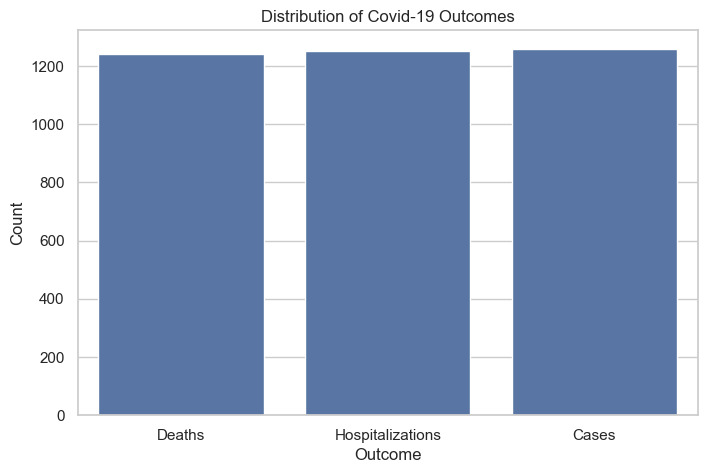

In [38]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='outcome')
plt.title("Distribution of Covid-19 Outcomes")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()

**2.Age Group Count**

*SHOWS : which age groups have more records*

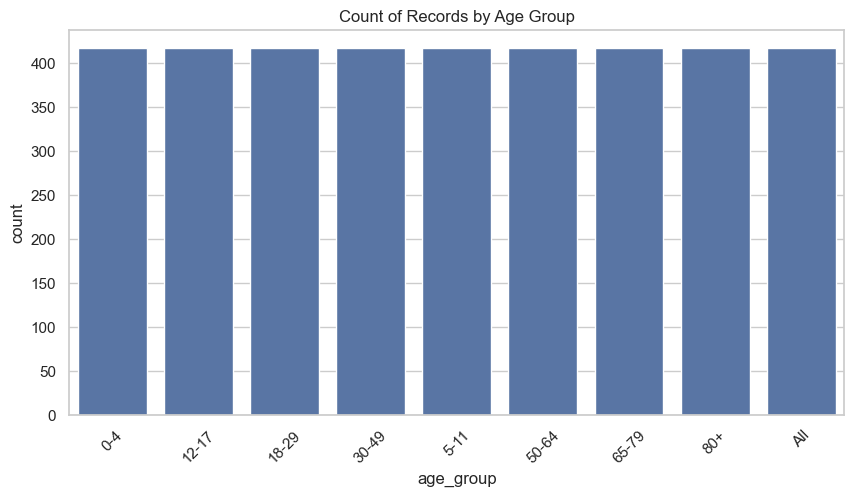

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='age_group')
plt.title("Count of Records by Age Group")
plt.xticks(rotation=45)
plt.show()

**3.Unvaccinated Rate by Outcomes**

*SHOWS : how unvaccinated rate affects outcome categories*

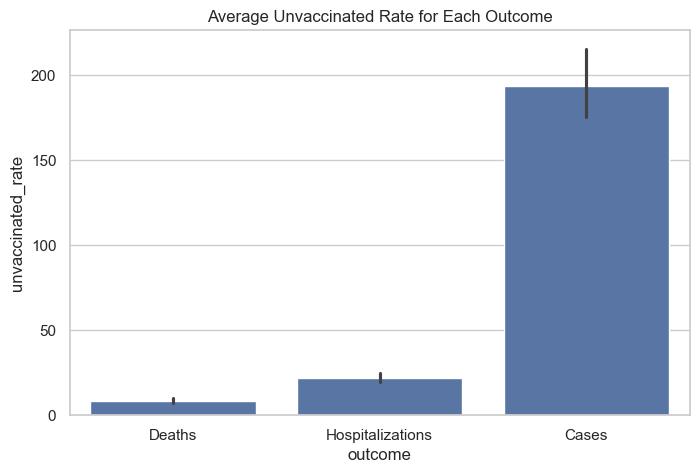

In [40]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='outcome', y='unvaccinated_rate')
plt.title("Average Unvaccinated Rate for Each Outcome")
plt.show()

**4.Boosted Rate by Age Group**

*SHOWS : which age groups have higher booster coverage*

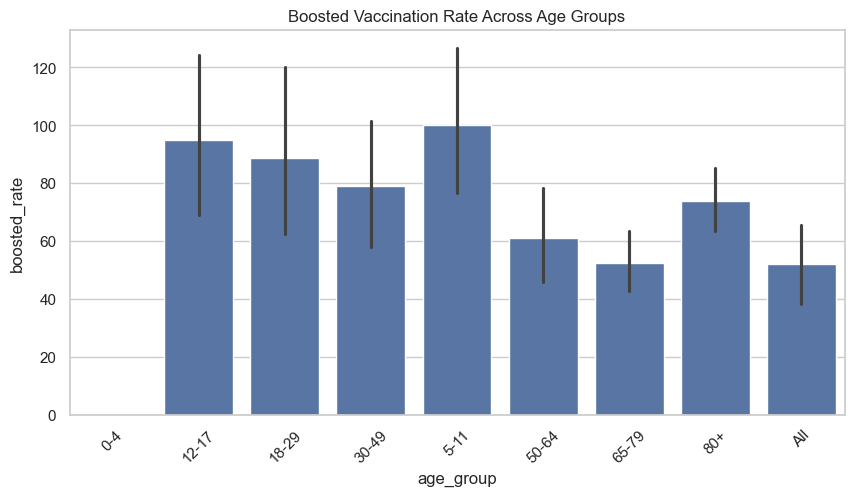

In [41]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='age_group', y='boosted_rate')
plt.title("Boosted Vaccination Rate Across Age Groups")
plt.xticks(rotation=45)
plt.show()

**5.Population Vaccinated vs Unvaccinated**

*shows the difference between vaccinated & unvaccinated population*

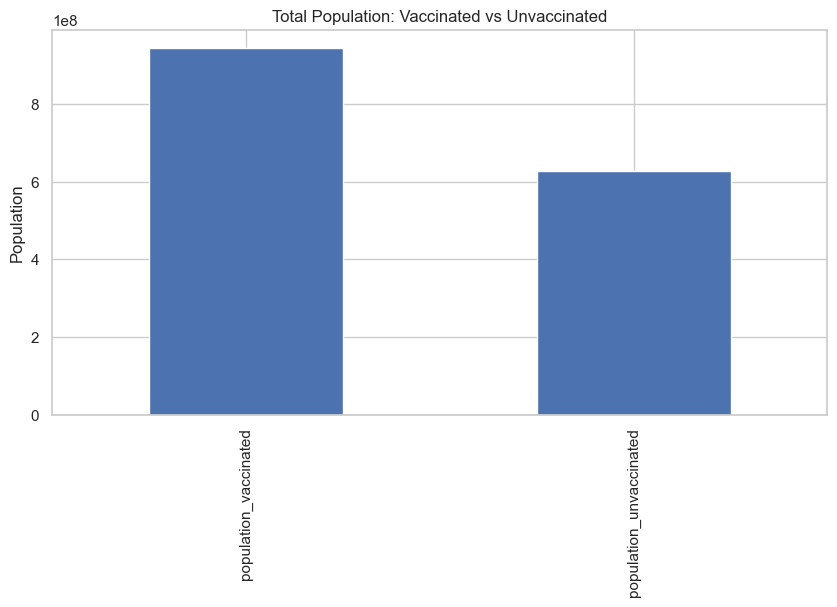

In [42]:
plt.figure(figsize=(10,5))
df[['population_vaccinated', 'population_unvaccinated']].sum().plot(kind='bar')
plt.title("Total Population: Vaccinated vs Unvaccinated")
plt.ylabel("Population")
plt.show()

**6.Correlation Heatmap (Numeric columns)**

*SHOWS : which rate or columns are related to each other*

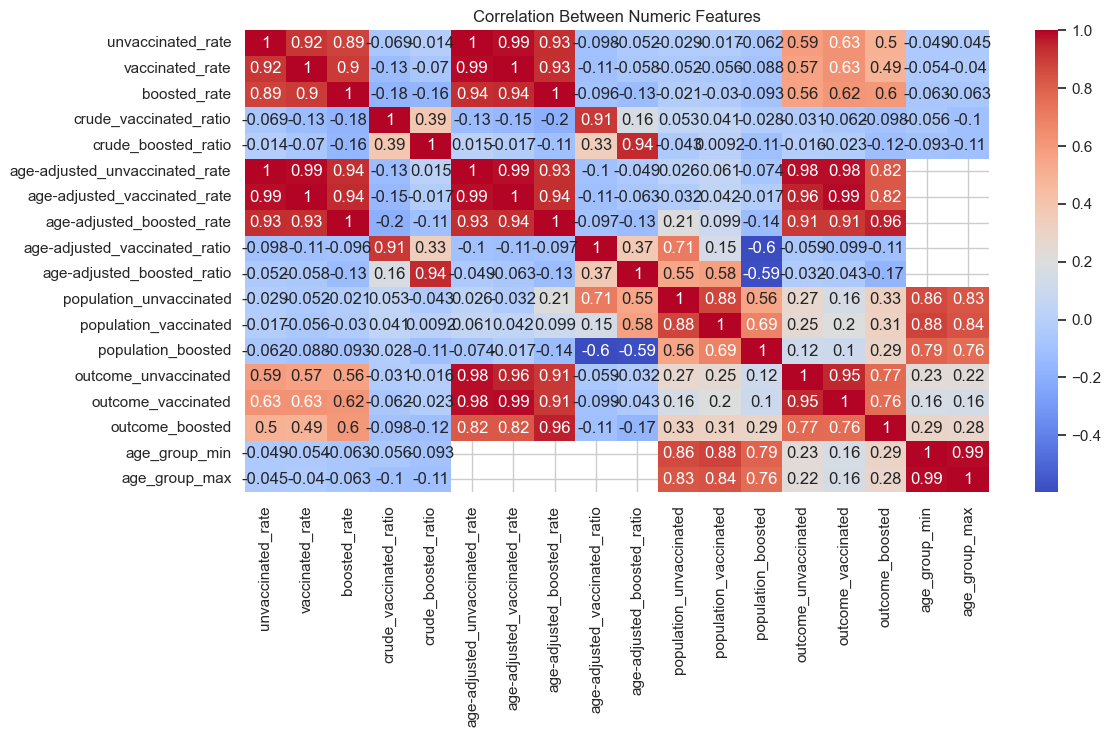

In [43]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numeric Features")
plt.show()

**7.Unvccinated Rate by Age Group**

*shows how unvaccinated rates across different age group*

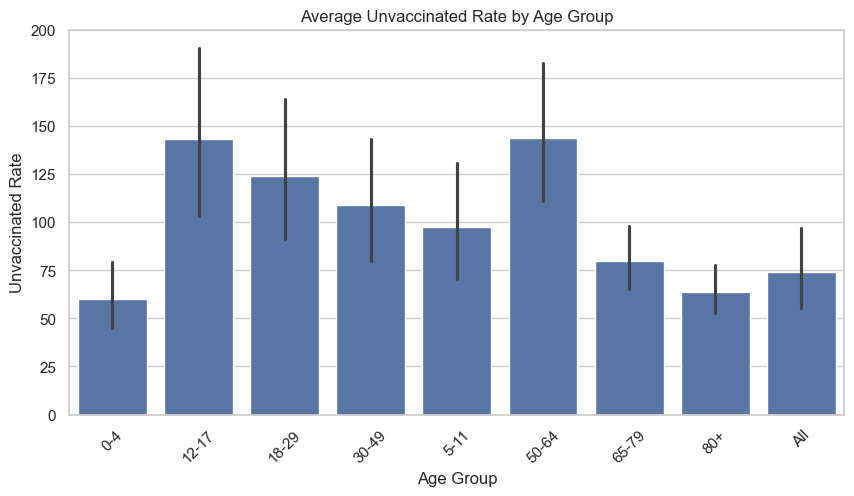

In [48]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='age_group', y='unvaccinated_rate')
plt.xticks(rotation=45)
plt.title("Average Unvaccinated Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Unvaccinated Rate")
plt.show()

**8.Trend of unvaccinated rate over time**
*line plot shows how the unvaccinated rate changes over time*

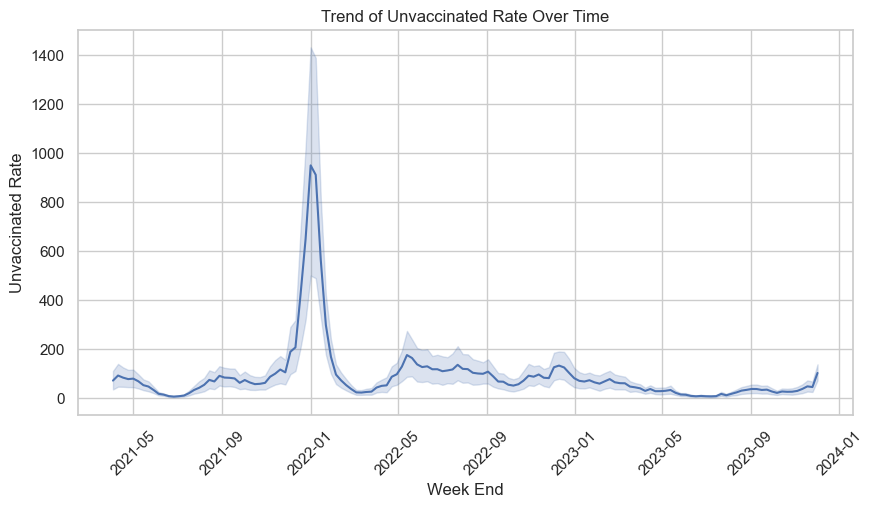

In [51]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='week_end', y='unvaccinated_rate')
plt.xticks(rotation=45)
plt.title("Trend of Unvaccinated Rate Over Time")
plt.xlabel("Week End")
plt.ylabel("Unvaccinated Rate")
plt.show()

*CONCLUSION*

This historical analysis of COVID-19 outcomes and vaccination data clearly shows that vaccination played a crucial role in reducing severe impacts of the pandemic. As vaccination coverage increased, there was a noticeable decline in hospitalizations, severe cases, and deaths across different age groups. Vaccinated populations consistently experienced better health outcomes compared to unvaccinated groups, highlighting the effectiveness of vaccines in preventing serious illness. Although infection rates varied over time and across regions, the overall trend demonstrates that widespread vaccination significantly helped control the spread of COVID-19 and reduced mortality. These findings emphasize the importance of vaccination as a key public health strategy in managing pandemics and protecting vulnerable populations.
